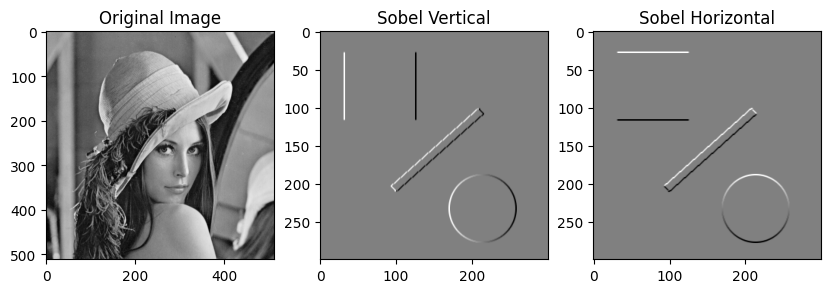

In [1]:
from matplotlib.pyplot import *
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import convolve
from scipy.signal import convolve2d


from PIL import Image, ImageOps

from scipy import ndimage

def load_image(filename, as_gray=False, as_float=False):
    if as_gray:
        a = np.asarray(Image.open(filename).convert('L'))
    else:
        a = np.asarray(Image.open(filename))
    if as_float:
        return a.astype(np.float) / 255
    else:
        return a

def display_image(im, as_gray=False, title=None):
    plt.figure(figsize=(9,4))
    if as_gray:
        plt.imshow(im, cmap='gray')
    else:
        plt.imshow(im)
    if title is not None:
        plt.title(title)

def display_vec(v, title=None):
    plt.figure(figsize=(9,4))
    plt.plot(v)
    if title is not None:
        plt.title(title)

def sobel_filter_1d(image, axis='horizontal'):
    if axis == 'horizontal':
        kernel = np.array([1, 2, 1])
    elif axis == 'vertical':
        kernel = np.array([-1, 0, 1])
    else:
        raise ValueError("Axis must be 'horizontal' or 'vertical'")

    filtered_image = np.convolve(image, kernel, mode='same')
    return filtered_image


CircleLineRect = load_image('/workspaces/Image_processing/CircleLineRect.png', as_gray=True, as_float=False)


#sobel_filter_1d(CircleLineRect, 'horizontal')

lena = load_image('/workspaces/Image_processing/lena.png', as_gray=True, as_float=False)

zurlim = load_image('/workspaces/Image_processing/zurlim.png', as_gray=True, as_float=False)






#2d Method used for Lena


vertical_sobel = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype=np.float32)
horizontal_sobel = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]], dtype=np.float32)

Ix = convolve2d(CircleLineRect, vertical_sobel, mode='same', boundary='wrap')
Iy = convolve2d(CircleLineRect, horizontal_sobel, mode='same', boundary='wrap')



plt.figure(figsize=(10, 4))

plt.subplot(131), plt.imshow(lena, cmap='gray'), plt.title('Original Image')
plt.subplot(132), plt.imshow(Ix, cmap='gray'), plt.title('Sobel Vertical')
plt.subplot(133), plt.imshow(Iy, cmap='gray'), plt.title('Sobel Horizontal')
plt.show()

In [2]:
print('Image dimensions:', CircleLineRect.shape)

Image dimensions: (300, 300)


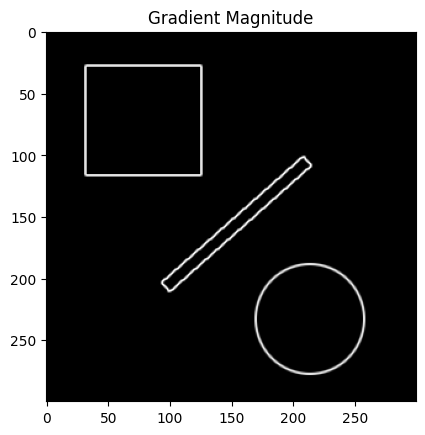

In [3]:
gradient_magnitude = np.sqrt(np.square(Ix) + np.square(Iy))

gradient_magnitude *= 255.0 / gradient_magnitude.max()

plt.imshow(gradient_magnitude, cmap='gray')
plt.title("Gradient Magnitude")
plt.show()

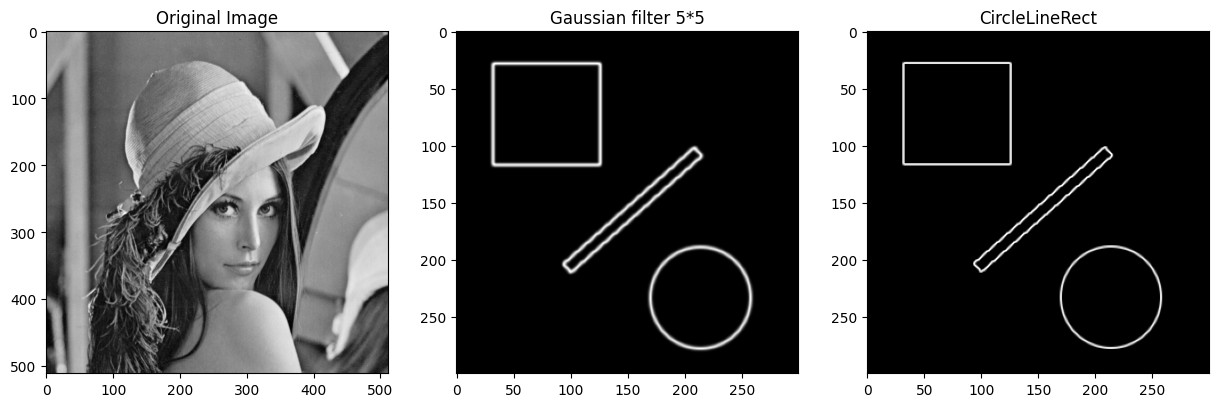

In [4]:
kernel_size = 10
sigma = 1.0

kernel = np.fromfunction(
    lambda x, y: (1/ (2 * np.pi * sigma**2)) *
                  np.exp(-((x - (kernel_size - 1) / 2)**2 + (y - (kernel_size - 1) / 2)**2) / (2 * sigma**2)),
    (kernel_size, kernel_size)
)
kernel /= np.sum(kernel)
Gaussien_filter_5 = convolve2d(gradient_magnitude, kernel, mode='same', boundary='wrap')

# Display the original and blurred images
plt.figure(figsize=(15, 10))
plt.subplot(131), plt.imshow(lena, cmap='gray'), plt.title('Original Image')
plt.subplot(132), plt.imshow(Gaussien_filter_5, cmap='gray'), plt.title('Gaussian filter 5*5')
plt.subplot(133),  plt.imshow(gradient_magnitude, cmap='gray'), plt.title('CircleLineRect')
plt.show()

**Canny Edge detection**

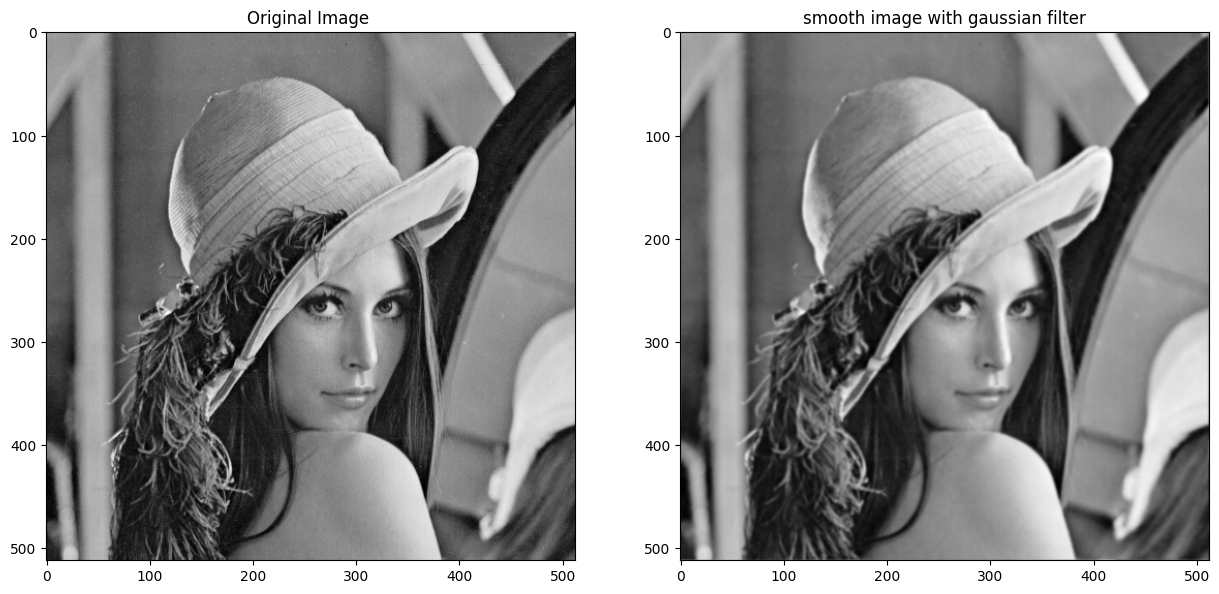

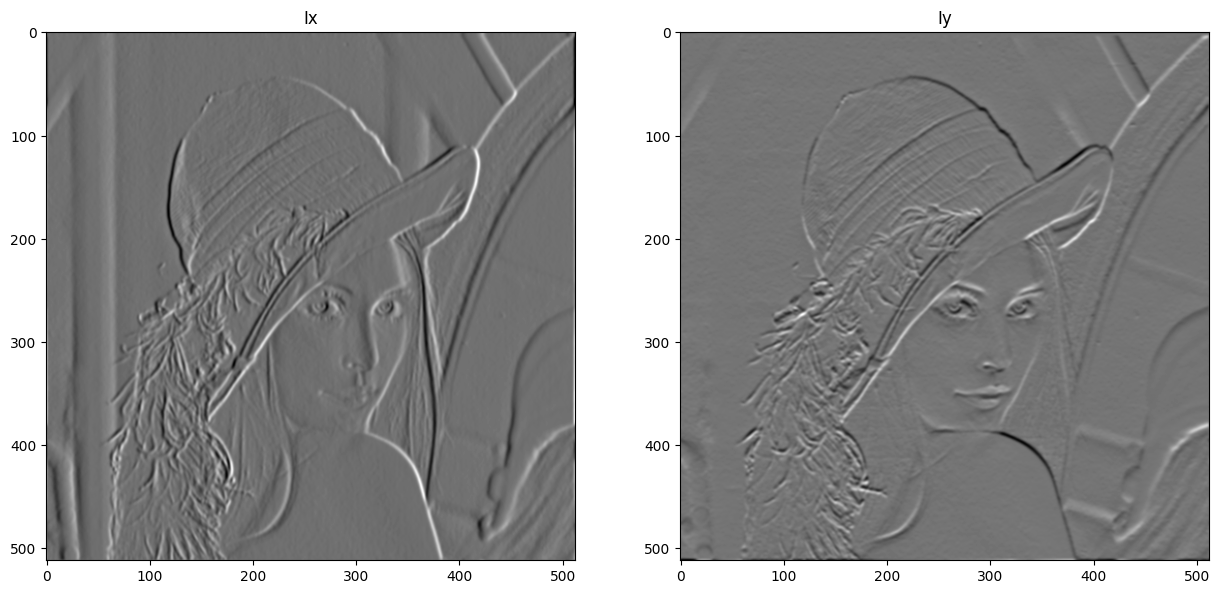

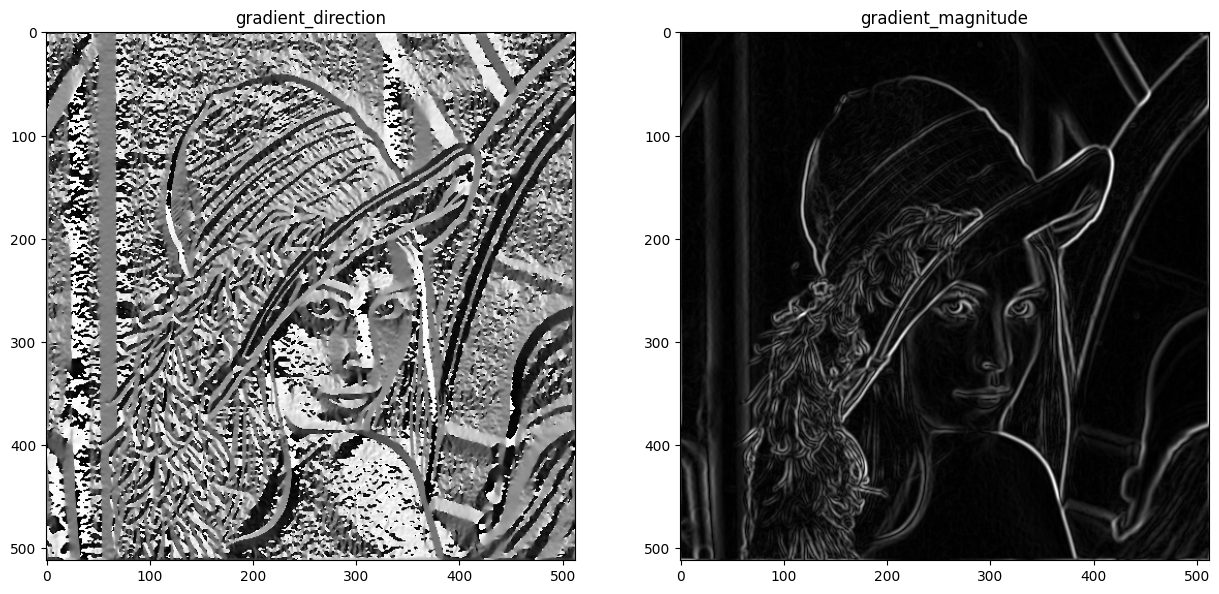

In [84]:
I = load_image('/workspaces/Image_processing/CircleLineRect.png', as_gray=True, as_float=False)
#I = load_image('/workspaces/Image_processing/zurlim.png', as_gray=True, as_float=False)
I = load_image('/workspaces/Image_processing/lena.png', as_gray=True, as_float=False)

#step 1 smoothing of the image

kernel_size = 5
sigma = 1.0

kernel = np.fromfunction(
    lambda x, y: (1/ (2 * np.pi * sigma**2)) *
                  np.exp(-((x - (kernel_size - 1) / 2)**2 + (y - (kernel_size - 1) / 2)**2) / (2 * sigma**2)),
    (kernel_size, kernel_size)
)
kernel /= np.sum(kernel)
Gaussien_filter_6 = convolve2d(I, kernel, mode='same', boundary='wrap')


# defining Ix and Iy
vertical_sobel = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype=np.float32)
horizontal_sobel = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]], dtype=np.float32)

Ix = convolve2d(Gaussien_filter_6, vertical_sobel, mode='same', boundary='wrap')
Iy = convolve2d(Gaussien_filter_6, horizontal_sobel, mode='same', boundary='wrap')



# approximating the gradient Magnitude

gradient_magnitude = np.sqrt(np.square(Ix) + np.square(Iy))
gradient_magnitude *= 255.0 / gradient_magnitude.max()
gradient_magnitude1 = gradient_magnitude.astype(np.uint8)



# calculate the direction based on Ix and Iy
gradient_direction = np.arctan2(Iy, Ix)

## Plots
# Display the original and blurred images

plt.figure(figsize=(15, 10))
plt.subplot(121), plt.imshow(I, cmap='gray'), plt.title('Original Image ')
plt.subplot(122),  plt.imshow(Gaussien_filter_6, cmap='gray'), plt.title('smooth image with gaussian filter')
plt.show()

# Display Ix and Iy

plt.figure(figsize=(15, 10))
plt.subplot(121), plt.imshow(Ix, cmap='gray'), plt.title('Ix')
plt.subplot(122), plt.imshow(Iy, cmap='gray'), plt.title('Iy')
plt.show()

# Display gradient_magnitude and gradient_direction

plt.figure(figsize=(15, 10))
plt.subplot(121), plt.imshow(gradient_direction, cmap='gray'), plt.title('gradient_direction')
plt.subplot(122), plt.imshow(gradient_magnitude, cmap='gray'), plt.title('gradient_magnitude')
plt.show()

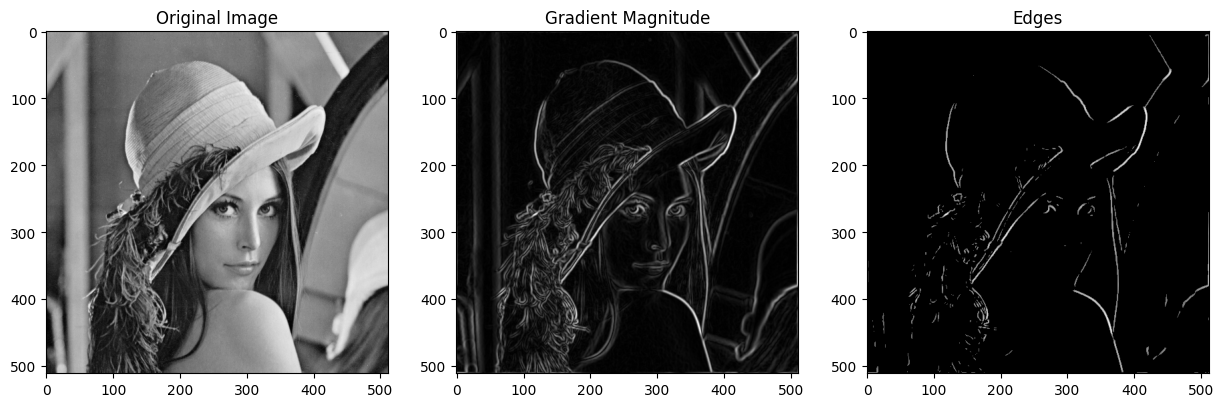

In [85]:
# Assuming gradient_magnitude and I are defined
threshold = 100 # Adjust this threshold as needed

# Create a copy of the gradient_magnitude to work with
edges = np.copy(gradient_magnitude1)

# Set the edges to 0 if the gradient_magnitude is lower than the threshold
edges[gradient_magnitude1 < threshold] = 0

# Display the original and blurred images
plt.figure(figsize=(15, 10))
plt.subplot(131), plt.imshow(I, cmap='gray'), plt.title('Original Image')
plt.subplot(132), plt.imshow(gradient_magnitude, cmap='gray'), plt.title('Gradient Magnitude')

plt.subplot(133), plt.imshow(edges, cmap='gray'), plt.title('Edges')
plt.show()



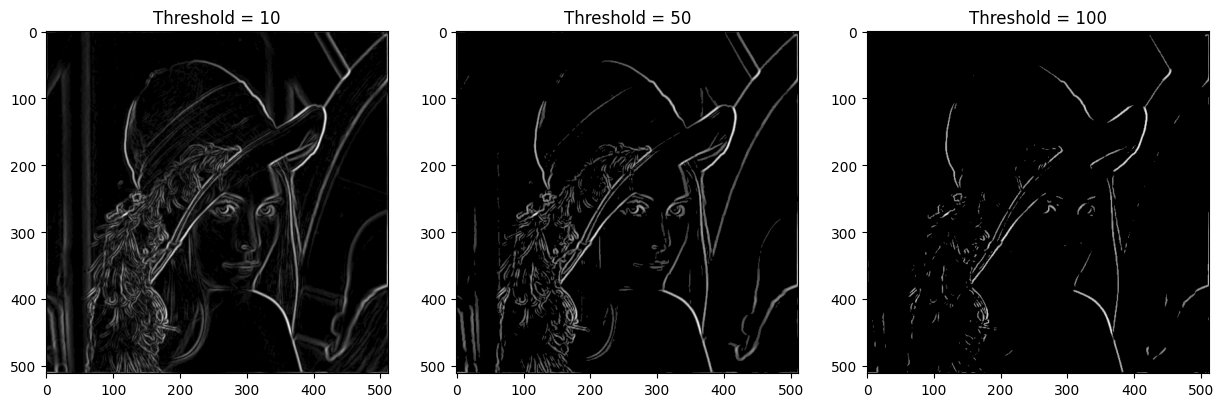

In [86]:
edges_10 = np.copy(gradient_magnitude1)
edges_10[gradient_magnitude1 < 10] = 0

edges_50 = np.copy(gradient_magnitude1)
edges_50[gradient_magnitude1 < 50] = 0

edges_100 = np.copy(gradient_magnitude1)
edges_100[gradient_magnitude1 < 100] = 0

# Display the original and blurred images
plt.figure(figsize=(15, 10))
plt.subplot(131), plt.imshow(edges_10, cmap='gray'), plt.title('Threshold = 10')
plt.subplot(132), plt.imshow(edges_50, cmap='gray'), plt.title('Threshold = 50')
plt.subplot(133), plt.imshow(edges_100, cmap='gray'), plt.title('Threshold = 100')
plt.show()


In [87]:
import numpy as np

def non_max_suppression(gradient_magnitude, gradient_direction):
    # Get the dimensions of the gradient magnitude image
    height, width = gradient_magnitude.shape
    # Create an output image initialized with zeros
    suppressed_image = np.zeros_like(gradient_magnitude, dtype=np.uint8)

    # Define gradient direction quantization values (0, 1, 2, 3)
    quantized_directions = (gradient_direction * 4 / np.pi + 0.5).astype(int) % 4

    for y in range(1, height - 1):
        for x in range(1, width - 1):
            mag = gradient_magnitude[y, x]
            direction = quantized_directions[y, x]

            if direction == 0:  # Horizontal edge
                neighbors = [gradient_magnitude[y, x - 1], gradient_magnitude[y, x + 1]]
            elif direction == 1:  # 45-degree edge
                neighbors = [gradient_magnitude[y - 1, x + 1], gradient_magnitude[y + 1, x - 1]]
            elif direction == 2:  # Vertical edge
                neighbors = [gradient_magnitude[y - 1, x], gradient_magnitude[y + 1, x]]
            else:  # 135-degree edge
                neighbors = [gradient_magnitude[y - 1, x - 1], gradient_magnitude[y + 1, x + 1]]

            # Check if the current pixel is a local maximum in the direction orthogonal to the edge
            if all(mag >= neighbor for neighbor in neighbors):
                suppressed_image[y, x] = mag

    return suppressed_image

(<matplotlib.image.AxesImage at 0x7f730e25f820>,
 Text(0.5, 1.0, 'suppressed_edges'))

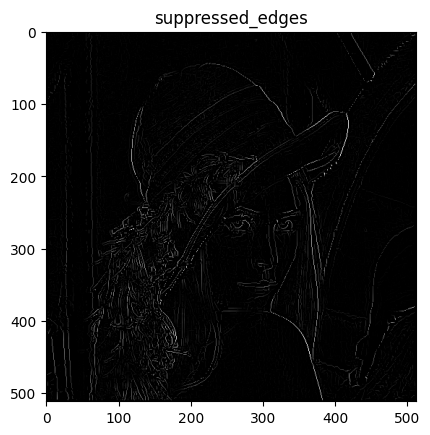

In [88]:
suppressed_edges = non_max_suppression(gradient_magnitude, gradient_direction)
plt.imshow(suppressed_edges, cmap='gray'), plt.title('suppressed_edges')
